In [1]:
# load library
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import platform
import plotly.express as px
from platform import python_version
import jupyterlab

%matplotlib inline

In [2]:
# load csv file
group_cpm = pd.read_csv("~/Cameron Lab Dropbox/Xing-Huang Gao/CORT_Fish_Oil/Fish_Oil_Skin/cpm_WTvsKcTie2.csv",
                        index_col=0, header =[0])

In [3]:
group_cpm.head()

KC-TIE2        WT
Xkr4   -1.308859  0.782488
Rp1    -0.982476 -0.150370
Sox17   0.661347  1.673300
Mrpl15  5.171597  4.898335
Lypla1  6.025616  5.937702

In [4]:
# rename index column
group_cpm.rename(columns={'': 'gene_symbol'}, inplace=True)

In [5]:
# check column names
group_cpm.columns.values

array(['KC-TIE2', 'WT'], dtype=object)

In [6]:
# check row and col numbers
group_cpm.shape

(15436, 2)

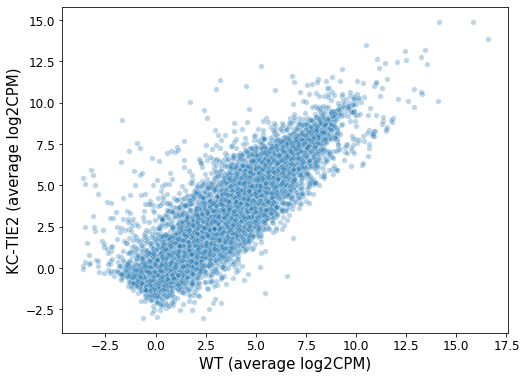

In [7]:
# bivariate plot of wt vs. Kc-Tie2 log2 TMM
fig,ax=plt.subplots(figsize =(8, 6))
sb.scatterplot(data = group_cpm, x = 'WT', y = 'KC-TIE2', x_jitter = 0.5, y_jitter = 0.5, 
               edgecolors = 'w', palette = 'Blues', marker ='o', alpha = 0.3, s=30);

# add axis labels
ax.set_xlabel(xlabel = 'WT (average log2CPM)', color='black', size =15)
ax.set_ylabel(ylabel = 'KC-TIE2 (average log2CPM)', color='black', size =15)

# increase font sizes for ticks

for tick in ax.get_xticklabels():
    tick.set_fontsize (12)
for tick in ax.get_yticklabels():
    tick.set_fontsize(12)

In [8]:
px.scatter(group_cpm, x= 'WT', y = 'KC-TIE2', hover_name=group_cpm.index.values, 
           trendline="ols")

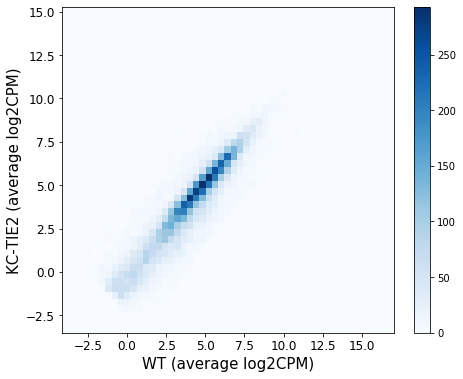

In [11]:
# create a heatmap with hist2d to show the relationship between 'price' and 'carat'
fig,ax = plt.subplots(figsize=(7,6))

# setup bin edges for x and y axis
bins_x = np.arange(group_cpm['WT'].min()-0.5, group_cpm['WT'].max()+0.5, 0.4)
bins_y = np.arange(group_cpm['KC-TIE2'].min()-0.5, group_cpm['KC-TIE2'].max()+0.5, 0.4)

plt.hist2d(data=group_cpm, x="WT", y= "KC-TIE2", cmap=plt.cm.Blues, cmin =-5, bins =[bins_x, bins_y]);
# adjust color key bar
plt.colorbar(orientation="vertical",ticklocation='auto',fraction= 0.1);

# add axis labels
ax.set_xlabel(xlabel = 'WT (average log2CPM)', color='black', size =15)
ax.set_ylabel(ylabel = 'KC-TIE2 (average log2CPM)', color='black', size =15);

# increase font sizes for ticks

for tick in ax.get_xticklabels():
    tick.set_fontsize (12)
for tick in ax.get_yticklabels():
    tick.set_fontsize(12)


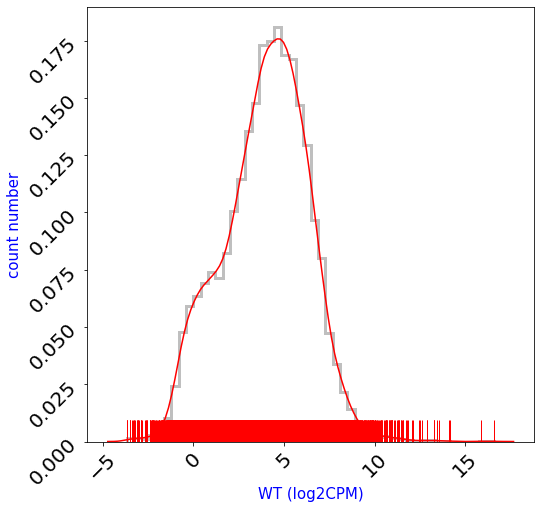

In [12]:
fig, ax = plt.subplots(figsize =(8, 8))
sb.distplot(group_cpm['WT'], kde = True, rug = True, color = 'red',
            hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.5, "color": "grey"}) # distribution plot with seaborn
ax.set_xlabel(xlabel = 'WT (log2CPM)', color = 'b', size = 15)
ax.set_ylabel(ylabel = 'count number', color ='b', size =15) # add y-axis label and color and size

for tick in ax.get_yticklabels(): # iterate each tick label and adjust fontsize
    tick.set_fontsize(20)
    tick.set_rotation(45)
for tick in ax.get_xticklabels():
    tick.set_fontsize(20)
    tick.set_rotation(45)
plt.show()

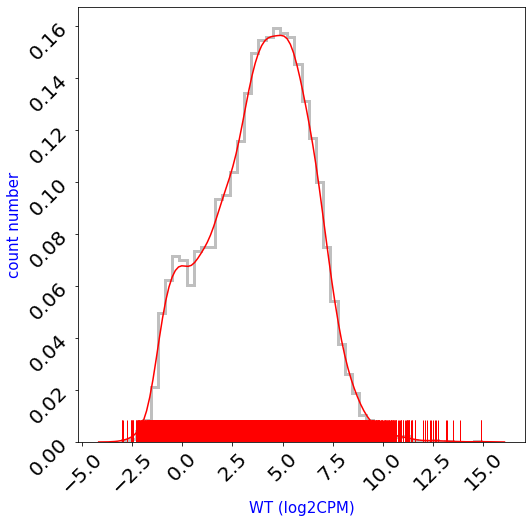

In [13]:
fig, ax = plt.subplots(figsize =(8, 8))
sb.distplot(group_cpm['KC-TIE2'], kde = True, rug = True, color = 'red',
            hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.5, "color": "grey"}) # distribution plot with seaborn
ax.set_xlabel(xlabel = 'WT (log2CPM)', color = 'b', size = 15)
ax.set_ylabel(ylabel = 'count number', color ='b', size =15) # add y-axis label and color and size

for tick in ax.get_yticklabels(): # iterate each tick label and adjust fontsize
    tick.set_fontsize(20)
    tick.set_rotation(45)
for tick in ax.get_xticklabels():
    tick.set_fontsize(20)
    tick.set_rotation(45)
plt.show()

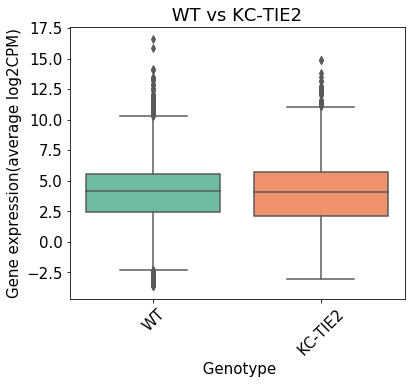

In [14]:
fig,ax = plt.subplots(figsize=(6, 5))

sb.boxplot(data=group_cpm.iloc[:,0:2], palette="Set2", saturation=0.85, order =["WT", "KC-TIE2"]);

# add labels for both axis
ax.set_xlabel(xlabel=' Genotype', size=15, color="black")
ax.set_ylabel(ylabel='Gene expression(average log2CPM)', size=15, color="black")

# increase the font size for tick labels
for tick in ax.get_xticklabels():
    tick.set_fontsize(15)
    tick.set_rotation(45)
for tick in ax.get_yticklabels():
    tick.set_fontsize(15)
    
# add fig title
ax.set_title(' WT vs KC-TIE2 ', size=18);